In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('online_shoppers_intention.csv')

In [14]:
df.dropna(inplace=True)

In [15]:
df['Revenue'] = df['Revenue'].astype(int)

In [16]:
X = pd.get_dummies(df.drop('Revenue', axis=1), drop_first=True)
y = df['Revenue']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Accuracy in %:", round(metrics.accuracy_score(y_test, y_pred) * 100), "%")

Confusion Matrix:
 [[2054   48]
 [ 222  142]]
Accuracy: 0.8905109489051095
Accuracy in %: 89 %


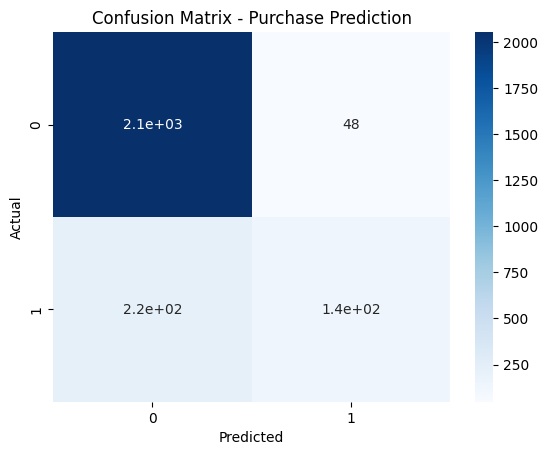

In [21]:
conf_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Purchase Prediction")
plt.show()